This is the first Section in the `chapter` : [Changing color-space](https://github.com/Nhan121/Some-statistical-GANs-simulations-drafts-/tree/master/Image_processing%20%26%20computer_vision/Image%20processing/Chapter1), you will learn
- **Section 1.** Changing color by adjust the `accessing_pixel_value` from one or more than two channels.
- **Section 2.** Channel-order-interchanging, spliting & merging images.
- **Section 3.** HSV color-spaces and its applications.
- **Section 4.** Another color-spaces.

In this file/kernel, we only focus on the **Section 1.** and the difference when loading `skimage`, since the `color-mode` in `OpenCV` is `BGR` and we will discuss later in the next Section with the function `cv2.cvtColor()` and the `flag = cv2.COLOR_BGR2RGB`.

## 1. Accessing & modifying `pixel-values`
As we mentioned before in the previous [track](https://github.com/Nhan121/Some-statistical-GANs-simulations-drafts-/blob/master/Image_processing%20%26%20computer_vision/Preliminaries/GETTING%20STARTED.ipynb), there are 3 channels of an image stored as `3D-array` in [skimage](https://scikit-image.org/docs/dev/api/skimage.color.html?fbclid=IwAR14Jg2c2IrR038uJEGlJWpt3AjG6mFPO7A030VzXxwF4FXuryi7bjNLPh8) are `Red, Green, Blue` respectively,
### 1.1. Accessing `pixel-value`
$\qquad \diamond$ First of all, we need load the image with `imread` from `skimage.io` alias by `si` to more convenient when calling another functions.


(1422, 1777, 3)


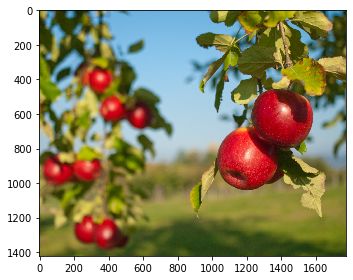

In [1]:
import skimage.io as si
import matplotlib.pyplot as plt

path = r"C:\Users\Admin\Desktop\apple.jpg"
img = si.imread(path)
si.imshow(img)
print(img.shape)

$\qquad$ Now, you can **access** a `pixel-value` by **`its row & column coordinates`**. 

In [2]:
point_1 = img[800:801, 1009:1010]; print('point_1(pixel-value) = %s'%point_1)
point_2 = img[400:401, 209:210]; print('point_2(pixel-value) = %s'%point_2)

point_1(pixel-value) = [[[201 173 123]]]
point_2(pixel-value) = [[[196 176  89]]]


$\qquad$ The `point_1` returns `[[[201  173  123]]]` meants the `red_pixel` in this points is `201`, the `green_pixel = 173` and the `blue = 123`.

$\qquad$ Moreover, we can access any area from the image by extracting the coordinates of a region of `(height, width)`. For instance, `width from 1000 to 1600` and `height from 400 to 1200` for the first region, alias by `area_1`.

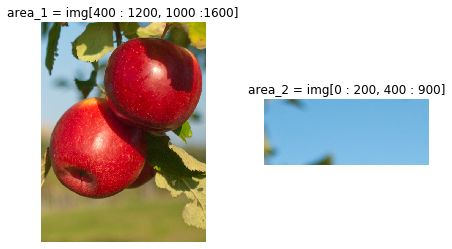

In [3]:
area_1 = img[400: 1200, 1000:1600]
area_2 = img[: 200, 400: 900]

plt.subplot(1,2,1); si.imshow(area_1); plt.title('area_1 = img[400 : 1200, 1000 :1600]'); plt.axis("off")
plt.subplot(1,2,2); si.imshow(area_2); plt.title('area_2 = img[0 : 200, 400 : 900]'); plt.axis("off")
plt.show()

$\qquad$ Next, extract the `pixel` of `range` in any chanel then display!

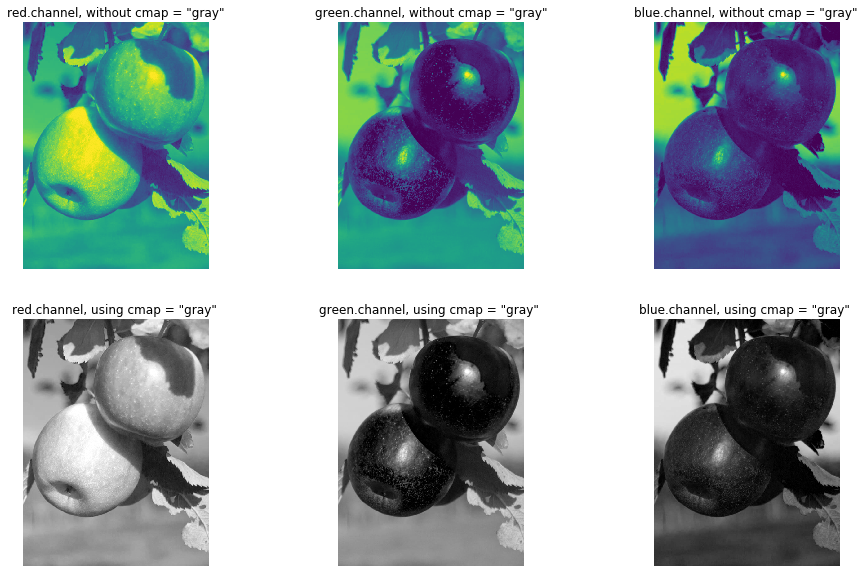

In [4]:
ar1_r = area_1[:, :, 0]   ## accesing only red-pixel
ar1_g = area_1[:, :, 1]   ## green pixel
ar1_b = area_1[:, :, 2]   ## blue pixel

images = [ar1_r, ar1_g, ar1_b]
titles = ['red', 'green', 'blue']

plt.figure(figsize = (16, 10))
for k in range(3):
    plt.subplot(2, 3, k+1)
    plt.imshow(images[k]); plt.title('%s.channel, without cmap = "gray"'%titles[k]), plt.axis("off")
    
    plt.subplot(2, 3, k+4)
    plt.imshow(images[k], cmap = "gray"), plt.title('%s.channel, using cmap = "gray" '%titles[k])
    plt.axis("off")    

$\qquad$ Hence, the `pixel_value` of an `area` from each `channel` has the **different `intensity`.**

### 1.2 Modifying `pixel-value`
We can modify the pixel values the ame way

In [5]:
print('point(100, 100), before modifying :\t', img[100, 100])
img[100, 100] = [255, 255, 100]
print('point(100, 100), after modifying :\t', img[100, 100])

point(100, 100), before modifying :	 [105 167 214]
point(100, 100), after modifying :	 [255 255 100]


## 2. Accesing a `channel` only then modifying its `pixel-values`
### 2.1. What happen with different pixel on the `Red-channel`?
$\qquad \diamond$ Noting that, we had named the `3D-array form` of image by `img`, and to keep them for another examples, we will append the `suffix: .copy()` to create a `copy` of the `3D-array`

                        image = img.copy()

$\qquad \diamond$  Now, we will assign **whole the first channel** (`Red`) by its maximum_pixel_value (`255`) via 

                        image[:, :, 0] = 255
then describe the difference?

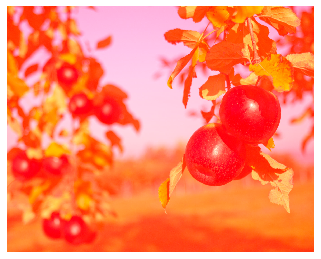

In [6]:
image = img.copy()
image[:, :, 0] = 255

si.imshow(image)
plt.axis("off")
plt.show()

$\qquad \qquad \bullet$ **Comments & remarks.**

$\qquad \qquad \qquad \circ$ The range of the pixel valuesis from 0 (dark or completely black) to 255 (bright or completely white). Hence, after accesing `Red-channel` and modifying `pixel_values` to `255`, whole the image looks like the `bright-red` figure.

$\qquad \qquad \qquad \circ$ But if we assign it to `0`, that meant `withour red-pixel`, and the range which contain the `red color` will become `black region`.

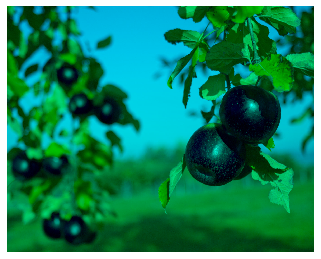

In [7]:
image = img.copy()
image[:, :, 0] = 0

si.imshow(image)
plt.axis("off")
plt.show()

### `Red-pixel` with different values.
$\qquad$ Finally, I will show you the affect on the `red-channel` when increasing the `red-pixel`, starting from 0.

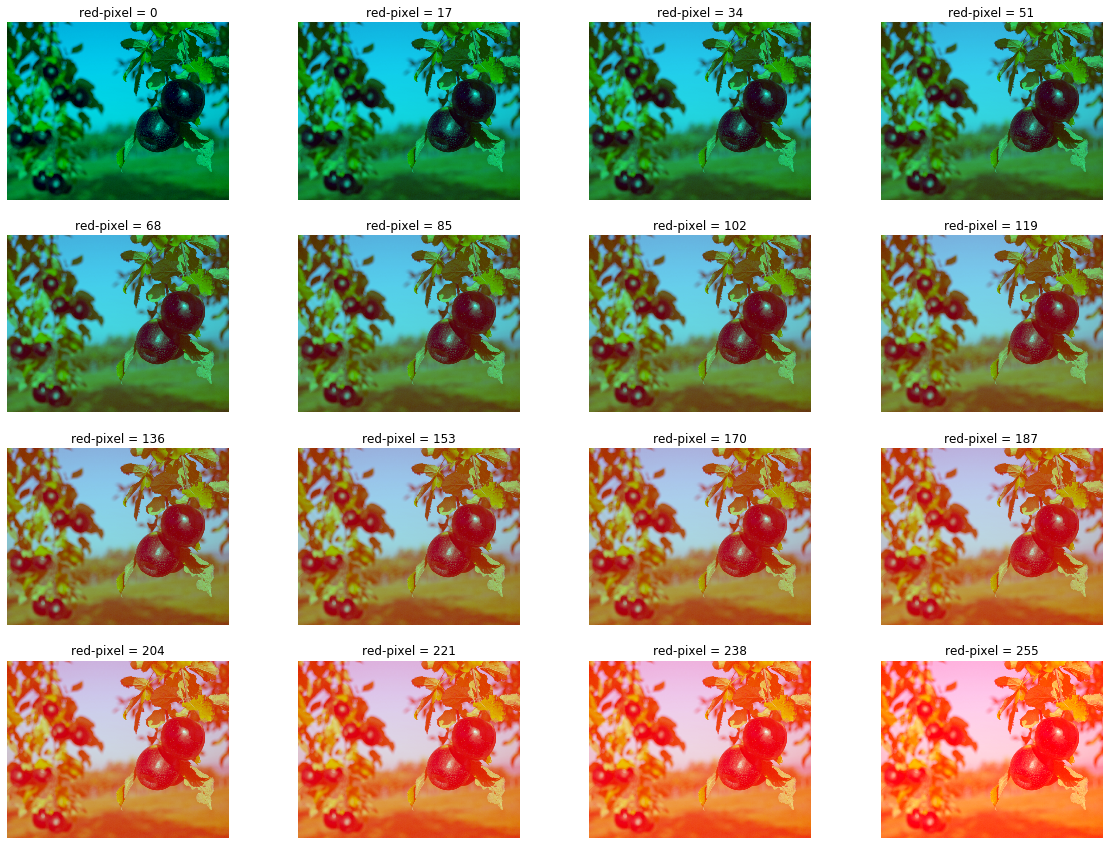

In [8]:
plt.figure(figsize = (20, 15))
for k in range(16):
    image = img.copy()
    plt.subplot(4, 4, k+1)
    pixel = int(17*k)
    image[:, :, 0] = pixel
    plt.imshow(image)
    plt.title("red-pixel = %s"%pixel); plt.axis("off")

### 2.2. For the `blue` channel

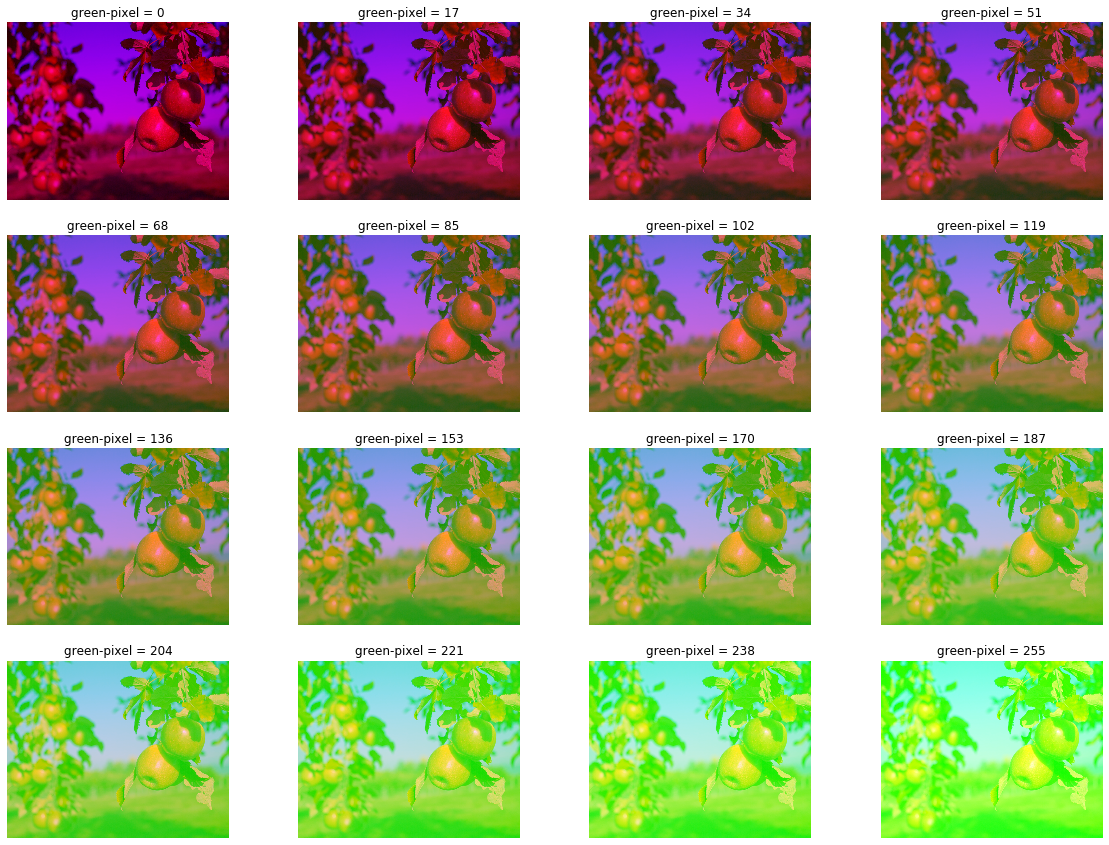

In [9]:
plt.figure(figsize = (20, 15))
for k in range(16):
    image = img.copy()
    plt.subplot(4, 4, k+1)
    pixel = int(17*k)
    image[:, :, 1] = pixel
    plt.imshow(image)
    plt.title("green-pixel = %s"%pixel); plt.axis("off")

### 2.3. For `blue-channel`

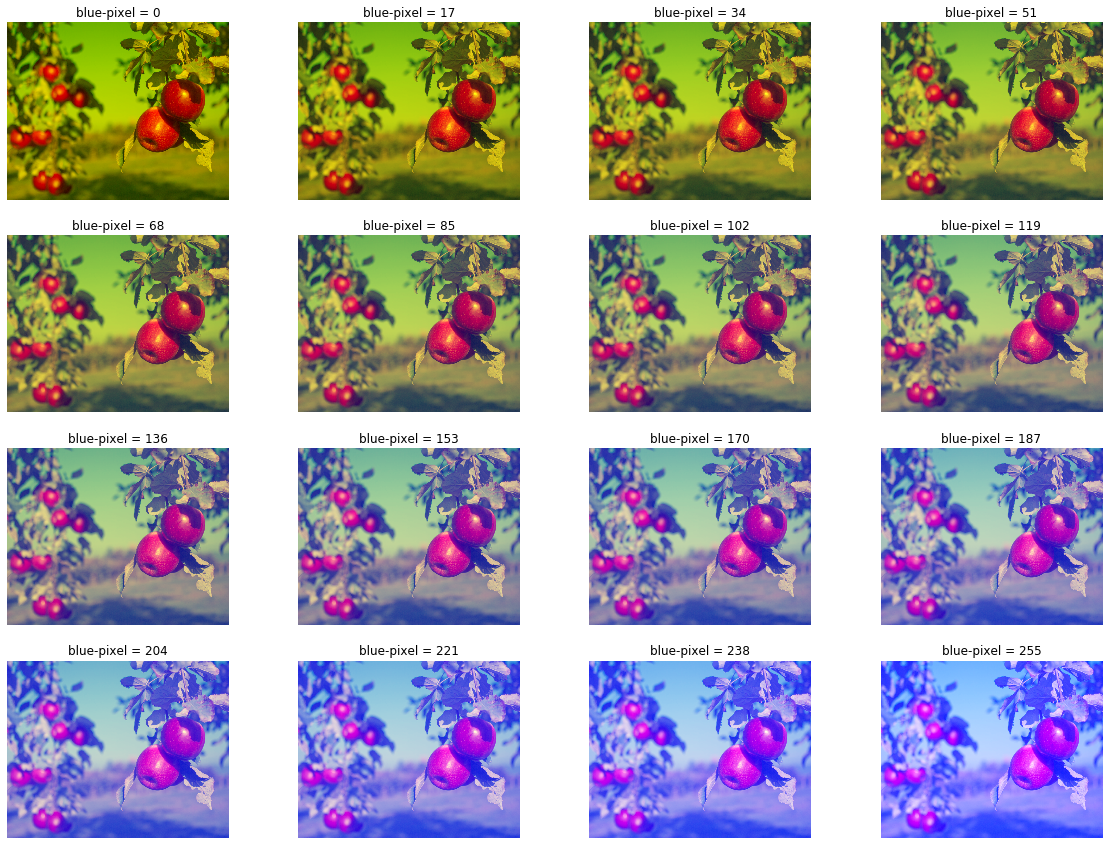

In [10]:
plt.figure(figsize = (20, 15))
for k in range(16):
    image = img.copy()
    plt.subplot(4, 4, k+1)
    pixel = int(17*k)
    image[:, :, 2] = pixel
    plt.imshow(image)
    plt.title("blue-pixel = %s"%pixel); plt.axis("off")

## 3. Bringging it all together
The first exercies in this Section is the secret in the openning in the Section 2: Channel-interchanging
#### Exercise 3.1. Green and blue apple.
$\qquad$ In this exercise, you can call the `variable`: `area_1` which created in `line In[3]: area_1 = img[400: 1200, 1000:1600]`

$\qquad \qquad$ **Step 1. `Blue apple`**

$\qquad \qquad \qquad \bullet$ Create a `copy` of `area_1` an named `blue_apple`.

$\qquad \qquad \qquad \bullet$ Extract the `red` and `blue` channels from the original image `area_1`.

$\qquad \qquad \qquad \bullet$ Use `accessing & modifying` to obtain the blue apple!

$\qquad \qquad$ **SOLUTION.**

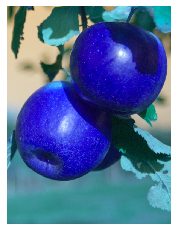

In [11]:
blue_apple = area_1.copy()
blue_apple[:,:,0] = area_1[:,:,2] 
blue_apple[:,:,2] = area_1[:,:,0] 
plt.imshow(blue_apple)
plt.axis("off")
plt.show()

$\qquad \qquad$ **Step 2. `Green apple`.**

$\qquad \qquad \qquad \bullet$ Now, do the samething but with the `red` and the `green` channels!

$\qquad \qquad \qquad \bullet$ Alias the `target-array` with `green_apple`.

$\qquad \qquad$ **SOLUTION.**

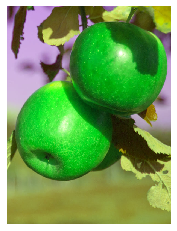

In [12]:
green_apple = area_1.copy()
green_apple[:,:,0] = area_1[:,:,1] 
green_apple[:,:,1] = area_1[:,:,0] 
plt.imshow(green_apple)
plt.axis("off")
plt.show()

#### Exercise 3.2. Region-inserting.
$\qquad$ Now, after completing the `Exercise 3.1`, you are asked to use these results and insert it into the original images `img`.

$\qquad$ You must display the original image beside the images-plug-in with the `titles`: `original image`, `insert: blue-apple`, `insert: green-apple` respectively to illustrate your works.

$\qquad \qquad$ **SOLUTION.**

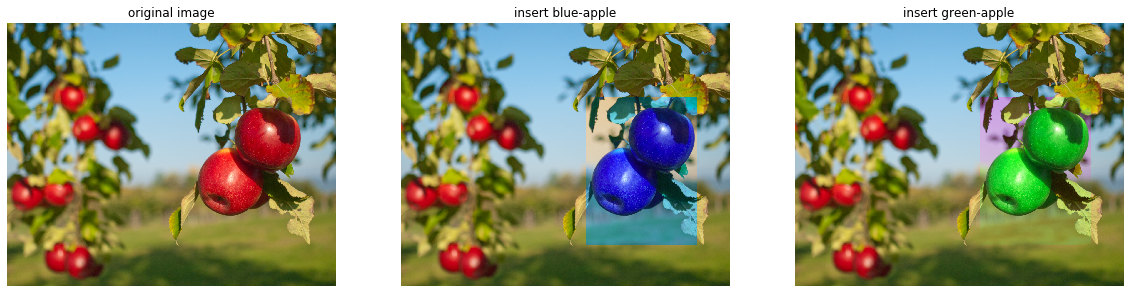

In [13]:
insert_images = [area_1, blue_apple, green_apple]
titles = ['original image', 'insert blue-apple', 'insert green-apple']

plt.figure(figsize = (20, 10))
for k in range(3):
    image = img.copy()
    image[400: 1200, 1000:1600] = insert_images[k]
    plt.subplot(1, 3, k+1)
    plt.imshow(image)
    plt.title(titles[k])
    plt.axis("off")

#### Exercise 3.3. Region-spliting & region-inserting.
$\qquad$ **Spliting.** Now, you must extract more 2 regions with `coordinate-ranges`: `[300:700, 230:650]` and `[800: , :500]`, then alias them to `area_2` and `area_3`. You are asked to show the `area_2` and `area_3` beside the original image `img`.

$\qquad$ **Converting.** Apply the `Exercise 3.1`, covert the `area_2` to `blue` and `area_3` to `green`.

$\qquad$ **Inserting.** Finally, plug all the outputs into the original image `img` then display the result.

$\qquad \qquad$ **SOLUTION.**

$\qquad \qquad \qquad$ **Step 1. `Spliting`**

In [14]:
area_2 = img[300:700, 230:650]
area_3 = img[800:, :500]

$\qquad \qquad \qquad \qquad$ Display the images.

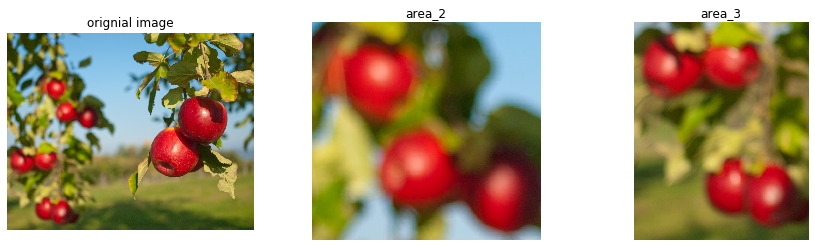

In [15]:
images = [img, area_2, area_3]
titles = ['orignial image', 'area_2', 'area_3']
plt.figure(figsize = (15, 4))
for k in range(3):
    plt.subplot(1,3,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    plt.axis("off")

$\qquad \qquad \qquad$ **Step 2. `Converting`**

$\qquad \qquad \qquad \qquad \bullet$ Convert the `area_2` to `blue-apple`

In [16]:
blue_apple = area_2.copy()
blue_apple[:,:,0] = area_2[:,:,2] 
blue_apple[:,:,2] = area_2[:,:,0] 

$\qquad \qquad \qquad \qquad \bullet$ Convert the `area_3` to `green-apple`

In [17]:
green_apple = area_3.copy()
green_apple[:,:,0] = area_3[:,:,1] 
green_apple[:,:,1] = area_3[:,:,0] 

$\qquad \qquad \qquad \qquad \bullet$ Display `img`, `blue_apple` and `green_apple`

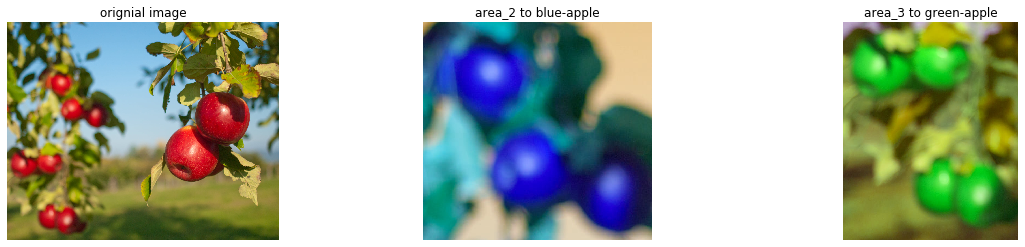

In [18]:
images = [img, blue_apple, green_apple]
titles = ['orignial image', 'area_2 to blue-apple', 'area_3 to green-apple']
plt.figure(figsize = (20, 4))
for k in range(3):
    plt.subplot(1,3,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    plt.axis("off")

$\qquad \qquad \qquad$ **Step 3. `Inserting`** 

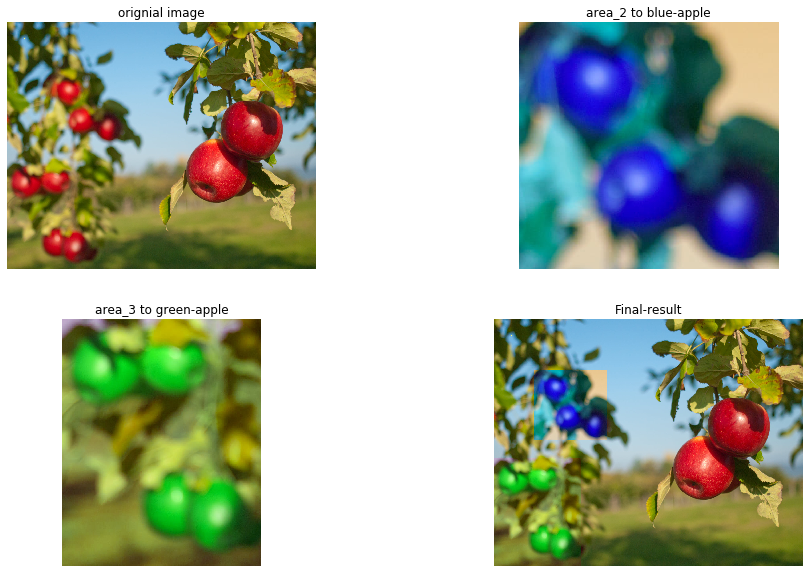

In [19]:
new_image = img.copy()
new_image[300:700, 230:650] = blue_apple
new_image[800:, :500] = green_apple

images = [img, blue_apple, green_apple, new_image]
titles = ['orignial image', 'area_2 to blue-apple', 'area_3 to green-apple', 'Final-result']
plt.figure(figsize = (16, 10))
for k in range(4):
    plt.subplot(2,2,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    plt.axis("off")